## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [75]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping 
from keras.layers import Dropout
from keras import regularizers
from numpy.random import seed, randint
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [9]:
#A)

X_trainval, X_test, y_trainval, y_test = train_test_split(reviews[0], Y[0] , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                                  random_state=43)

count_vectorizer = CountVectorizer(max_features=10000)
X_train_bow = count_vectorizer.fit_transform(X_train)
X_val_bow = count_vectorizer.transform(X_val)
X_test_bow = count_vectorizer.transform(X_test)

print(X_train_bow.shape)
print(X_val_bow.shape)
print(X_test_bow.shape)

(14062, 10000)
(4688, 10000)
(6250, 10000)


In [10]:
#B) 
# for a single word
print("Single words")
word_counts = np.asarray(X_train_bow.sum(axis=0)).flatten()
vocab = count_vectorizer.get_feature_names_out()

word_freq = list(zip(vocab, word_counts))
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)
# Print top 50 most common words
for word, freq in word_freq_sorted[:50]:
    print(f"{word}: {freq}")

print("\n")

# for a review
print("Review words")
sample_idx = 0
sample_vector = X_train_bow[sample_idx]

vocab = count_vectorizer.get_feature_names_out()

word_indices = sample_vector.nonzero()[1]
word_counts = sample_vector.data

bow_representation = {vocab[i]: count for i, count in zip(word_indices, word_counts)}

for word, count in sorted(bow_representation.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {count}")

Single words
the: 189639
and: 92662
of: 81947
to: 76525
is: 60238
br: 57951
it: 54143
in: 52645
this: 42800
that: 41490
was: 27177
as: 26199
with: 24930
for: 24876
movie: 24663
but: 24014
film: 22633
on: 19237
you: 19123
not: 17170
he: 16856
are: 16513
his: 16441
have: 15701
be: 15166
one: 15123
all: 13579
at: 13266
they: 12683
by: 12631
who: 12078
an: 12051
from: 11532
so: 11485
like: 11294
there: 10550
her: 10346
or: 10061
just: 10059
about: 9690
out: 9667
if: 9386
has: 9364
what: 9080
some: 8931
good: 8460
can: 8205
more: 8039
she: 8001
when: 7971


Review words
the: 4
it: 3
and: 2
wacky: 2
see: 2
this: 1
movie: 1
is: 1
not: 1
only: 1
funniest: 1
film: 1
ever: 1
created: 1
greatest: 1
my: 1
hats: 1
off: 1
to: 1
mr: 1
mrs: 1
rest: 1
of: 1
cast: 1
good: 1
morning: 1
satan: 1
want: 1
post: 1
go: 1
now: 1


## Single word representation
<b>Single words are represented in a way that, the higher is the word in Bag-of-Words, the more frequently it is used in a review. We can say they are represented in a hierarchy most to least frequently used words</b>

## Whole review representation
<b>In whole review representation we can see how often each word was used in the context of that, exact review. We can see how repetitive the person was while writing the review</b>


In [12]:
#C)
num_classes = 2 # 0 for negative, 1 for positive
input_size = 10000 
seed(0)
tf.random.set_seed(0)

# convert the labels to one-hot encoded format
y_train_oh = to_categorical(y_train, num_classes)
y_val_oh = to_categorical(y_val, num_classes)

X_train_bow_dense = X_train_bow.toarray()
X_val_bow_dense = X_val_bow.toarray()


model = Sequential() 
model.add(Dense(units = 32, activation='relu', input_dim=input_size)) # add a hidden layer
model.add(Dense(units = num_classes, activation='softmax')) #add the output layer
model.summary()

sgd = SGD(learning_rate = 0.1)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])


history = model.fit(X_train_bow_dense, y_train_oh, 
                    epochs=10, batch_size=32, verbose=1,
                    validation_data=(X_val_bow, y_val_oh))

C:\Users\Kuba\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │       320,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,098 (1.22 MB)

 Trainable params: 320,098 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5610 - loss: 0.6966 - val_accuracy: 0.6064 - val_loss: 0.6482
Epoch 2/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6872 - loss: 0.6010 - val_accuracy: 0.7771 - val_loss: 0.5207
Epoch 3/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7478 - loss: 0.5253 - val_accuracy: 0.7564 - val_loss: 0.5813
Epoch 4/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7525 - loss: 0.5247 - val_accuracy: 0.8116 - val_loss: 0.4410
Epoch 5/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7823 - loss: 0.4780 - val_accuracy: 0.8381 - val_loss: 0.3838
Epoch 6/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8105 - loss: 0.4361 - val_accuracy: 0.7884 - val_loss: 0.4508
Epoch 7/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8391 - loss: 0.3690 - val_accuracy: 0.8304 - val_loss: 0.4025
Epoch 8/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8327 - loss: 0.3818 - val_accuracy: 0.

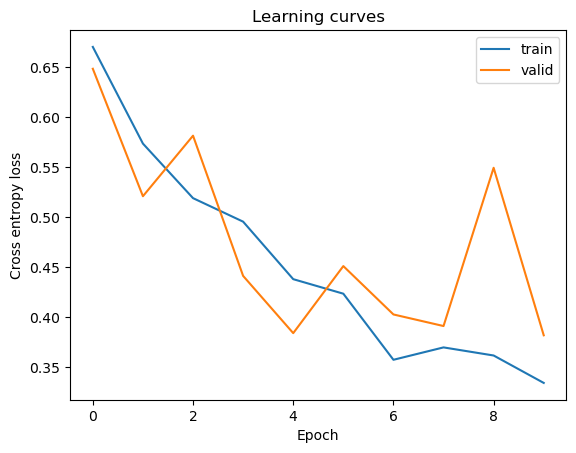

In [21]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

In [57]:
#Optimazation 

early_stopping_opt = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Replace CountVectorizer with TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_dense = X_train_tfidf.toarray()
X_val_dense = X_val_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

seed(1) 
tf.random.set_seed(1)

model_opt = Sequential() 
model_opt.add(Dense(units = 32, activation='relu', input_dim=input_size, kernel_regularizer=regularizers.l2(0.001))) # add l2 regularization
model_opt.add(Dropout(0.2))
model_opt.add(Dense(units = num_classes, activation='softmax')) #add the output layer

adam_opt = Adam(learning_rate=0.0005) # Use Adam optimizer
model_opt.compile(loss = 'binary_crossentropy', optimizer = adam_opt, metrics = ['accuracy'])

history_opt = model_opt.fit(
    X_train_dense, 
    y_train_oh,
    epochs=25,  
    batch_size=64, 
    verbose=1,
    validation_data=(X_val_dense, y_val_oh),  # Use TF-IDF validation data
    callbacks=[early_stopping_opt]  # Add early stopping
)

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6849 - loss: 0.6952 - val_accuracy: 0.8556 - val_loss: 0.6080
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8403 - loss: 0.5891 - val_accuracy: 0.8635 - val_loss: 0.5380
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8560 - loss: 0.5281 - val_accuracy: 0.8727 - val_loss: 0.4994
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8671 - loss: 0.4930 - val_accuracy: 0.8752 - val_loss: 0.4762
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8769 - loss: 0.4700 - val_accuracy: 0.8797 - val_loss: 0.4592
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8816 - loss: 0.4494 - val_accuracy: 0.8818 - val_loss: 0.4463
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8878 - loss: 0.4331 - val_accuracy: 0.8827 - val_loss: 0.4358
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8924 - loss: 0.4194 - val_accuracy: 0.

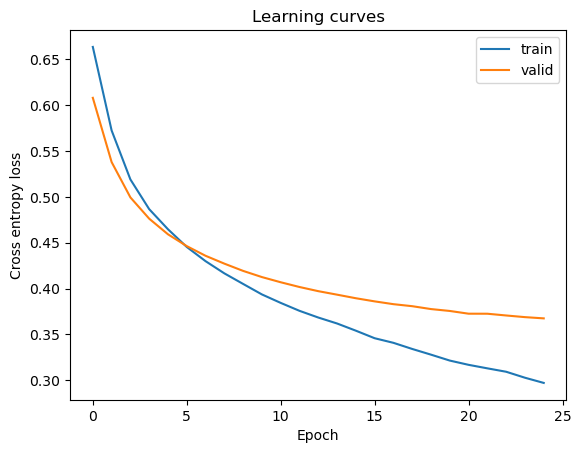

In [61]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history_opt.history['loss'], label = 'train')
plt.plot(history_opt.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

Optimized Model - Loss + accuracy on test data: [0.3711925446987152, 0.8857600092887878]
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.88      3117
    Positive       0.87      0.90      0.89      3133

    accuracy                           0.89      6250
   macro avg       0.89      0.89      0.89      6250
weighted avg       0.89      0.89      0.89      6250



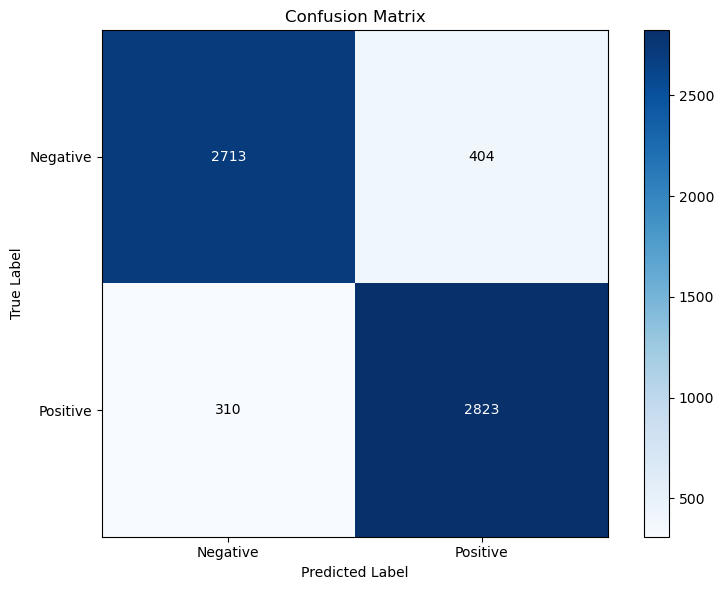

In [79]:
#D)


y_test_oh = to_categorical(y_test, num_classes)


print("Optimized Model - Loss + accuracy on test data: {}".format(model_opt.evaluate(X_test_dense, y_test_oh, verbose=0)))


y_pred_prob = model_opt.predict(X_test_dense)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_oh, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))


plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [95]:
#E)

def predict_sentiment(model, vectorizer, custom_sentences):
    
    X_custom = vectorizer.transform(custom_sentences)
    X_custom_dense = X_custom.toarray()
    
   
    predictions = model.predict(X_custom_dense)
    
  
    print("Custom Sentence Sentiment Analysis:")
    for i, sentence in enumerate(custom_sentences):
        # For binary classification with softmax output
        sentiment = "Positive" if predictions[i][1] > 0.5 else "Negative"
        confidence = max(predictions[i])
        print(f"\nSentence: \"{sentence}\"")
        print(f"Sentiment: {sentiment}")
        print(f"Confidence: {confidence:.4f}")


custom_sentences = [
    "This movie was absolutely amazing, I loved every second of it!",
    "The restaurant experience was terrible and the service was awful.",
    "The book was neither great nor terrible, just average.",
    "I cannot believe I haven't watched the movie before. It was incredible, for sure I will watch it again!!!",
    "Are people really into this? It's fascinating but so broadly plotted."
]


predict_sentiment(model_opt, tfidf_vectorizer, custom_sentences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Custom Sentence Sentiment Analysis:

Sentence: "This movie was absolutely amazing, I loved every second of it!"
Sentiment: Positive
Confidence: 0.9963

Sentence: "The restaurant experience was terrible and the service was awful."
Sentiment: Negative
Confidence: 0.9996

Sentence: "The book was neither great nor terrible, just average."
Sentiment: Negative
Confidence: 0.9993

Sentence: "I cannot believe I haven't watched the movie before. It was incredible, for sure I will watch it again!!!"
Sentiment: Positive
Confidence: 0.9955

Sentence: "Are people really into this? It's fascinating but so broadly plotted."
Sentiment: Positive
Confidence: 0.9691
